In [ ]:
!apt-get update -qq
!apt-get install -y -qq tesseract-ocr libtesseract-dev poppler-utils

!pip install numpy==1.26.4
!pip install opencv-python-headless==4.10.0.84
!pip install PyMuPDF==1.24.9
!pip install pytesseract pillow gTTS pandas


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 126374 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.6.0-1ubuntu1.5_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.6.0-1ubuntu1.5) ...
Selecting previously unselected package libleptonica-dev.
Preparing to unpack .../libleptonica-dev_1.82.0-3build1_amd64.deb ...
Unpacking libleptonica-dev (1.82.0-3build1) ...
Selecting previously unselected package libtesseract-dev:amd64.
Preparing to unpack .../libtesseract-dev_4.1.1-2.1build1_amd64.deb ...
Unpacking libtesseract-dev:amd64 (4.1.1-2.1build1) ...
Selecting previously unselected package poppler-utils.
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.10_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.10) ...
Setting u

In [ ]:
import pytesseract
import fitz  # PyMuPDF
import cv2
import pandas as pd
from PIL import Image
from gtts import gTTS
import re, os
from difflib import get_close_matches
from google.colab import files


In [ ]:
import sqlite3
import pandas as pd
from google.colab import files

# Connect to DB (creates smartlearn.db if not present)
conn = sqlite3.connect("smartlearn.db")
cursor = conn.cursor()

# Create tables if they don't exist
cursor.execute("""CREATE TABLE IF NOT EXISTS StudentDetails (
    rollno INTEGER PRIMARY KEY,
    name TEXT,
    contact_no TEXT,
    email TEXT
)""")

cursor.execute("""CREATE TABLE IF NOT EXISTS Faculty (
    faculty_id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT,
    contact TEXT
)""")

cursor.execute("""CREATE TABLE IF NOT EXISTS Subjects (
    subject_id INTEGER PRIMARY KEY AUTOINCREMENT,
    subject_name TEXT,
    resource_pdf TEXT
)""")

cursor.execute("""CREATE TABLE IF NOT EXISTS Reminder (
    reminder_id INTEGER PRIMARY KEY AUTOINCREMENT,
    task TEXT,
    due_date TEXT
)""")

cursor.execute("""CREATE TABLE IF NOT EXISTS Attendance (
    rollno INTEGER,
    date TEXT,
    status TEXT
)""")

cursor.execute("""CREATE TABLE IF NOT EXISTS Progress (
    rollno INTEGER,
    subject_name TEXT,
    marks INTEGER
)""")

# Upload PDF
print("Please upload your subject PDF file...")
uploaded = files.upload()
pdf_filename = list(uploaded.keys())[0]
print("Uploaded:", pdf_filename)

# Insert sample data
students = [
    (101,"Aarav Shah","9876000001","aarav@example.com"),
    (102,"Kriti Rao","9876000002","kriti@example.com"),
    (103,"Dev Mehta","9876000003","dev@example.com")
]
cursor.executemany("INSERT INTO StudentDetails VALUES (?,?,?,?)", students)

faculty = [
    ("Dr. Sneha Kapoor","9823000001"),
    ("Prof. Aditya Menon","9823000002")
]
cursor.executemany("INSERT INTO Faculty (name,contact) VALUES (?,?)", faculty)

cursor.execute("INSERT INTO Subjects (subject_name, resource_pdf) VALUES (?, ?)", ("AIML", pdf_filename))

reminders = [
    ("Assignment 1","2025-09-20"),
    ("Quiz 1","2025-09-25")
]
cursor.executemany("INSERT INTO Reminder (task,due_date) VALUES (?,?)", reminders)

attendance = [
    (101,"2025-09-05","Present"),
    (102,"2025-09-05","Absent")
]
cursor.executemany("INSERT INTO Attendance VALUES (?,?,?)", attendance)

progress = [
    (101,"AIML",92),
    (102,"AIML",74)
]
cursor.executemany("INSERT INTO Progress VALUES (?,?,?)", progress)

conn.commit()
print("Data inserted into smartlearn.db successfully.")

# Show tables
for table in ["StudentDetails","Faculty","Subjects","Reminder","Attendance","Progress"]:
    df = pd.read_sql_query(f"SELECT * FROM {table}", conn)
    print(f"\n--- {table} ---")
    display(df)


Please upload your subject PDF file...


Saving 123.pdf to 123 (4).pdf
Uploaded: 123 (4).pdf
Data inserted into smartlearn.db successfully.

--- StudentDetails ---


rollno        name  contact_no              email
0     101  Aarav Shah  9876000001  aarav@example.com
1     102   Kriti Rao  9876000002  kriti@example.com
2     103   Dev Mehta  9876000003    dev@example.com


--- Faculty ---


faculty_id                name     contact
0           1    Dr. Sneha Kapoor  9823000001
1           2  Prof. Aditya Menon  9823000002


--- Subjects ---


subject_id subject_name resource_pdf
0           1         AIML  123 (4).pdf


--- Reminder ---


reminder_id          task    due_date
0            1  Assignment 1  2025-09-20
1            2        Quiz 1  2025-09-25


--- Attendance ---


rollno        date   status
0     101  2025-09-05  Present
1     102  2025-09-05   Absent


--- Progress ---


rollno subject_name  marks
0     101         AIML     92
1     102         AIML     74

In [ ]:
# Step 6: Query and Display Data

# 1. List all students
print("All Students:")
df_students = pd.read_sql_query("SELECT * FROM StudentDetails", conn)
display(df_students)

# 2. Upcoming reminders (sorted by due date)
print("Upcoming Reminders:")
df_reminders = pd.read_sql_query("SELECT * FROM Reminder ORDER BY due_date", conn)
display(df_reminders)

# 3. Attendance summary
print("Attendance Records:")
df_attendance = pd.read_sql_query("SELECT * FROM Attendance", conn)
display(df_attendance)

# 4. Student progress
print("Progress Records:")
df_progress = pd.read_sql_query("SELECT * FROM Progress", conn)
display(df_progress)


All Students:


rollno        name  contact_no              email
0     101  Aarav Shah  9876000001  aarav@example.com
1     102   Kriti Rao  9876000002  kriti@example.com
2     103   Dev Mehta  9876000003    dev@example.com

Upcoming Reminders:


reminder_id          task    due_date
0            1  Assignment 1  2025-09-20
1            2        Quiz 1  2025-09-25

Attendance Records:


rollno        date   status
0     101  2025-09-05  Present
1     102  2025-09-05   Absent

Progress Records:


rollno subject_name  marks
0     101         AIML     92
1     102         AIML     74

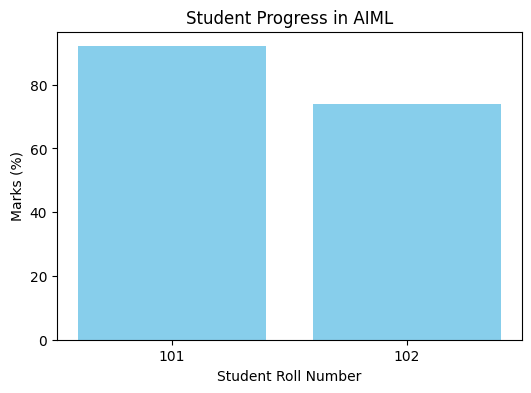

In [ ]:
import matplotlib.pyplot as plt

# Fetch progress data
df_progress = pd.read_sql_query("SELECT * FROM Progress", conn)

# Ensure roll numbers are integers
df_progress["rollno"] = df_progress["rollno"].astype(int)

# Plot bar chart
plt.figure(figsize=(6,4))
plt.bar(df_progress["rollno"], df_progress["marks"], color="skyblue")

# Add labels
plt.xlabel("Student Roll Number")
plt.ylabel("Marks (%)")
plt.title("Student Progress in AIML")

# Show roll numbers as integers on x-axis
plt.xticks(df_progress["rollno"])

plt.show()


In [ ]:
# Connect to DB
conn = sqlite3.connect("smartlearn.db")
cursor = conn.cursor()

# Create table for OCR content + audio
cursor.execute("""
CREATE TABLE IF NOT EXISTS LearningContent (
    content_id INTEGER PRIMARY KEY AUTOINCREMENT,
    source TEXT,
    extracted_text TEXT,
    audio_file TEXT
)
""")
conn.commit()
print("LearningContent table ready.")


LearningContent table ready.


In [ ]:
import pytesseract
import fitz  # PyMuPDF
from PIL import Image
import cv2
from gtts import gTTS
from google.colab import files

def preprocess_image(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 3)
    return gray

def ocr_image(img_path):
    pil_img = Image.fromarray(preprocess_image(img_path))
    return pytesseract.image_to_string(pil_img, config="--oem 3 --psm 6").strip()

def ocr_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    texts = []
    for page in doc:
        texts.append(page.get_text())
    return "\n".join(texts).strip()


In [ ]:
print("Upload your 4 images and 123.pdf...")
uploaded = files.upload()
uploaded_files = list(uploaded.keys())
print("Uploaded:", uploaded_files)

image_files = [f for f in uploaded_files if f.lower().endswith((".png",".jpg",".jpeg"))]
pdf_files = [f for f in uploaded_files if f.lower().endswith(".pdf")]

Upload your 4 images and 123.pdf...


Saving 1.png to 1 (1).png
Uploaded: ['1 (1).png']


In [ ]:
print("Upload your 4 images and 123.pdf...")
uploaded = files.upload()
uploaded_files = list(uploaded.keys())
print("Uploaded:", uploaded_files)

image_files = [f for f in uploaded_files if f.lower().endswith((".png",".jpg",".jpeg"))]
pdf_files = [f for f in uploaded_files if f.lower().endswith(".pdf")]

Upload your 4 images and 123.pdf...


Saving 2.png to 2 (1).png
Uploaded: ['2 (1).png']


In [ ]:
print("Upload your 4 images and 123.pdf...")
uploaded = files.upload()
uploaded_files = list(uploaded.keys())
print("Uploaded:", uploaded_files)

image_files = [f for f in uploaded_files if f.lower().endswith((".png",".jpg",".jpeg"))]
pdf_files = [f for f in uploaded_files if f.lower().endswith(".pdf")]

Upload your 4 images and 123.pdf...


Saving 3.png to 3 (1).png
Uploaded: ['3 (1).png']


In [ ]:
print("Upload your 4 images and 123.pdf...")
uploaded = files.upload()
uploaded_files = list(uploaded.keys())
print("Uploaded:", uploaded_files)

image_files = [f for f in uploaded_files if f.lower().endswith((".png",".jpg",".jpeg"))]
pdf_files = [f for f in uploaded_files if f.lower().endswith(".pdf")]

Upload your 4 images and 123.pdf...


Saving 4.png to 4 (1).png
Uploaded: ['4 (1).png']


In [ ]:
print("Upload your 4 images and 123.pdf...")
uploaded = files.upload()
uploaded_files = list(uploaded.keys())
print("Uploaded:", uploaded_files)

image_files = [f for f in uploaded_files if f.lower().endswith((".png",".jpg",".jpeg"))]
pdf_files = [f for f in uploaded_files if f.lower().endswith(".pdf")]

Upload your 4 images and 123.pdf...


Saving 123.pdf to 123 (5).pdf
Uploaded: ['123 (5).pdf']


In [ ]:
for img in image_files:
    text = ocr_image(img)
    audio_file = f"{img}.mp3"
    gTTS(text=text[:5000], lang='en').save(audio_file)
    cursor.execute("INSERT INTO LearningContent (source, extracted_text, audio_file) VALUES (?,?,?)",
                   (img, text, audio_file))

if pdf_files:
    pdf = pdf_files[0]
    text = ocr_pdf(pdf)
    audio_file = f"{pdf}.mp3"
    gTTS(text=text[:5000], lang='en').save(audio_file)
    cursor.execute("INSERT INTO LearningContent (source, extracted_text, audio_file) VALUES (?,?,?)",
                   (pdf, text, audio_file))

conn.commit()
print("OCR text + audio stored in DB successfully.")


OCR text + audio stored in DB successfully.


In [ ]:
# Get all stored content
df_content = pd.read_sql_query("SELECT * FROM LearningContent", conn)
print("Learning Content in DB:")
display(df_content)

# Example: Play the first stored audio
first_audio = df_content.loc[0, "audio_file"]

import IPython.display as ipd
ipd.Audio(first_audio)  # will play inside Colab


Learning Content in DB:


content_id       source                                     extracted_text  \
0           1  123 (5).pdf  Artificial Intelligence (AI) has grown into on...   

        audio_file  
0  123 (5).pdf.mp3